In [17]:
#Importer les bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error




In [18]:
#Importer dataset
data = 'car.data' 
df = pd.read_csv(data, header=None)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

df.head()
 

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [19]:
#Afficher les dimensions de dataset 
# 1728 instances et 7 variables.
df.shape

(1728, 7)

In [20]:
#Affichage de colonnes
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [21]:
#Afficher le résumé du jeu de données
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [22]:
#vérifier les fréquences des variables catégorielles.
#On peut voir que les variables « doors » et « persons » sont de nature catégorielle.
# donc les traiter comme des variables catégorielles.


col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts()) 

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [23]:
#Explorer la variable cible
#La variable cible « class » est de nature ordinale.

df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [24]:
## vérifier les valeurs manquantes dans les variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [25]:
#Déclarer le vecteur des caractéristiques et la variable cible

X = df.drop('class', axis=1)
y = df['class']


In [26]:
#Diviser les données en ensembles d’entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Vérifier la taille de X_train et X_test

print(X_train.shape, X_test.shape)


(1157, 6) (571, 6)


In [27]:
#Vérifier les types de données dans X_train
X_train.dtypes


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [28]:
#Encoder les variables catégorielles
#Prétraitement des Données
#Utilisation d’un OrdinalEncoder pour transformer les variables catégorielles en numériques :

cols_to_encode = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Création d'un dictionnaire pour encoder chaque colonne avec l'ordre voulu
mapping = {
    'buying': ['low', 'med', 'high', 'vhigh'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'doors': ['2', '3', '4', '5more'],
    'persons': ['2', '4', 'more'],
    'lug_boot': ['small', 'med', 'big'],
    'safety': ['low', 'med', 'high']
}

# Fonction pour appliquer le mapping à une colonne
def map_column(col, order):
    return col.apply(lambda x: order.index(x))

# Appliquer manuellement le mapping sur train et test
for col in cols_to_encode:
    X_train[col] = map_column(X_train[col], mapping[col])
    X_test[col] = map_column(X_test[col], mapping[col])


In [29]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,0
468,2,3,1,1,0,0
155,3,2,1,2,0,2
1721,0,0,3,2,0,2
1208,1,0,0,2,0,2


In [30]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,2,0,1,2
1201,1,0,0,1,1,1
628,2,2,3,0,2,1
1498,0,2,3,1,1,1
1263,1,0,2,2,1,0


In [31]:
#Instancier le classifieur
rfc10 = RandomForestClassifier(n_estimators=10, random_state=0)
rfc100 = RandomForestClassifier(n_estimators=100, random_state=0)
#Entraîner le modèle
rfc10.fit(X_train, y_train)
rfc100.fit(X_train, y_train)
#Prédire les résultats de l’ensemble de test
y_pred10 = rfc10.predict(X_test)
y_pred100 = rfc100.predict(X_test)
#Vérifier le score de précision
print('Accuracy score avec 10 arbres:', accuracy_score(y_test, y_pred10))
print('Accuracy score avec 100 arbres:', accuracy_score(y_test, y_pred100))

Accuracy score avec 10 arbres: 0.9597197898423818
Accuracy score avec 100 arbres: 0.9649737302977233


In [32]:

# Random Forest
#Instancier le classifieur
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
#Entraîner le modèle
rfc.fit(X_train, y_train)
#Prédire les résultats de l’ensemble de test
y_pred_rfc = rfc.predict(X_test)

# Régression Logistique (modèle linéaire)
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# SVM avec noyau polynomial (degree=3 par défaut)
svm_poly = SVC(kernel='poly', degree=3, random_state=0)
svm_poly.fit(X_train, y_train)
y_pred_svm = svm_poly.predict(X_test)


In [33]:

# Accuracy scores
acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)


# Calcul de R2 et RMSE (nécessitent des valeurs numériques)
# On encode les classes pour ces métriques
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)

y_pred_rfc_enc = le.transform(y_pred_rfc)
y_pred_lr_enc = le.transform(y_pred_lr)
y_pred_svm_enc = le.transform(y_pred_svm)

r2_rfc = r2_score(y_test_enc, y_pred_rfc_enc)
rmse_rfc = np.sqrt(mean_squared_error(y_test_enc, y_pred_rfc_enc))

r2_lr = r2_score(y_test_enc, y_pred_lr_enc)
rmse_lr = np.sqrt(mean_squared_error(y_test_enc, y_pred_lr_enc))

r2_svm = r2_score(y_test_enc, y_pred_svm_enc)
rmse_svm = np.sqrt(mean_squared_error(y_test_enc, y_pred_svm_enc))

print(f"Random Forest - Accuracy: {acc_rfc:.4f}, R2: {r2_rfc:.4f}, RMSE: {rmse_rfc:.4f}")
print(f"Logistic Regression - Accuracy: {acc_lr:.4f}, R2: {r2_lr:.4f}, RMSE: {rmse_lr:.4f}")
print(f"SVM Polynomial - Accuracy: {acc_svm:.4f}, R2: {r2_svm:.4f}, RMSE: {rmse_svm:.4f}")



Random Forest - Accuracy: 0.9650, R2: 0.7951, RMSE: 0.4014
Logistic Regression - Accuracy: 0.8214, R2: 0.1423, RMSE: 0.8211
SVM Polynomial - Accuracy: 0.9194, R2: 0.6124, RMSE: 0.5520


In [34]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Préparer les scores dans un tableau
scores = np.array([
    [acc_rfc, r2_rfc, -rmse_rfc],  # On met RMSE négatif pour que "plus grand" soit mieux
    [acc_lr,  r2_lr,  -rmse_lr],
    [acc_svm, r2_svm, -rmse_svm]
])

# Normaliser les scores entre 0 et 1 pour chaque métrique
scaler = MinMaxScaler()
scores_norm = scaler.fit_transform(scores)

# Calculer une somme globale par modèle (tu peux pondérer différemment si tu veux)
scores_sum = scores_norm.sum(axis=1)

model_names = ["Random Forest", "Logistic Regression", "SVM Polynomial"]
best_index = np.argmax(scores_sum)

print(f"Le meilleur modèle selon les 3 critères est : {model_names[best_index]}")



Le meilleur modèle selon les 3 critères est : Random Forest


In [35]:
# Créer le classifieur avec n\_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# Entraîner le modèle sur l’ensemble d’entraînement
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
# Afficher les scores des caractéristiques
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.305071
persons     0.234537
buying      0.161964
maint       0.148404
lug_boot    0.086875
doors       0.063149
dtype: float64

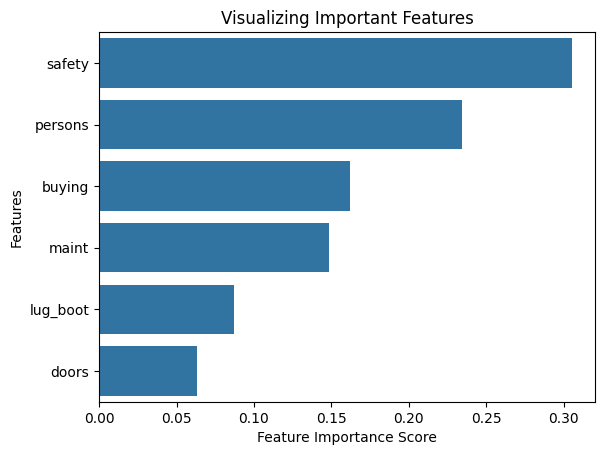

In [37]:
#Visualiser les scores des caractéristiques

# Créer un graphique à barres avec seaborn
sns.barplot(x=feature_scores, y=feature_scores.index)


# Ajouter des étiquettes au graphique

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')


#Ajouter un titre au graphique 

plt.title("Visualizing Important Features")


# Visualiser le graphique

plt.show()

In [38]:
#Construire le modèle Random Forest sur les caractéristiques sélectionnées
#Retirer la caractéristique la moins importante « doors » du modèle
# reconstruire le modèle et vérifier son impact sur la précision.

# Déclarer le vecteur des caractéristiques et la variable cible

X = df.drop(['class', 'doors'], axis=1)

y = df['class']


In [39]:
# Diviser les données en ensembles d’entraînement et de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [40]:
#Encoder les variables catégorielles

cols_to_encode = ['buying', 'maint', 'persons', 'lug_boot', 'safety']

# Création d'un dictionnaire pour encoder chaque colonne avec l'ordre voulu
mapping = {
    'buying': ['low', 'med', 'high', 'vhigh'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'persons': ['2', '4', 'more'],
    'lug_boot': ['small', 'med', 'big'],
    'safety': ['low', 'med', 'high']
}

# Fonction pour appliquer le mapping à une colonne
def map_column(col, order):
    return col.apply(lambda x: order.index(x))

# Appliquer manuellement le mapping sur train et test
for col in cols_to_encode:
    X_train[col] = map_column(X_train[col], mapping[col])
    X_test[col] = map_column(X_test[col], mapping[col])


In [41]:
#Instancier le classifieur
rfc = RandomForestClassifier(random_state=0)

#Entraîner le modèle
rfc.fit(X_train, y_train)

#Prédire les résultats de l’ensemble de test
y_pred = rfc.predict(X_test)

#Vérifier le score de précision
print('Accuracy score:', accuracy_score(y_test, y_pred))


Accuracy score: 0.9299474605954466


Confusion matrix:
 [[106  12   8   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


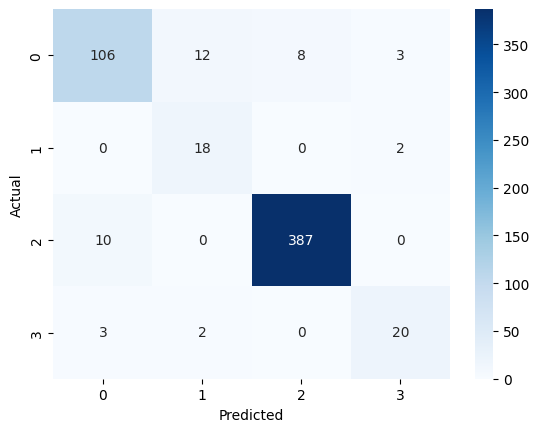

In [42]:
#Imprimer la matrice de confusion et la diviser en quatre parties
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [43]:
#Le rapport de classification est une autre façon d’évaluer
#  la performance d’un modèle de classification. 
# Il affiche les scores de précision, rappel, f1 et support pour le modèle.

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         acc       0.89      0.82      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.94      0.93      0.93       571



In [44]:
# 9 Sauvegarde du modèle
import joblib
joblib.dump(rfc, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
rfc100 = RandomForestClassifier(n_estimators=100)
rfc100.fit(X, y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
import os
os.makedirs("model", exist_ok=True)


In [47]:
import pickle

# Sauvegarde du modèle entraîné (ex : rfc100)
pickle.dump(rfc100, open("model/model.pkl", "wb"))

print("Modèle sauvegardé avec succès dans model/model.pkl")


Modèle sauvegardé avec succès dans model/model.pkl
